# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Ahmad Rehan Al Fariz
- **Email:** alfarizahmadrehan@gmail.com
- **ID Dicoding:** Ahmad Rehan Al Fariz

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1
Kategori produk mana yang memiliki rating tertinggi yang memiliki minimal 5% pesanan dari pesanan total
- Pertanyaan 2
Kategori produk apa saja yang memiliki penjualan terendah

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd         # Untuk manipulasi dan analisis data
import numpy as np          # Untuk operasi numerik
import matplotlib.pyplot as plt  # Untuk visualisasi data
import seaborn as sns       # Untuk visualisasi statistik
import re

## Data Wrangling

### Gathering Data

In [2]:
# Membaca CSV
order_reviews = pd.read_csv('data/order_reviews_dataset.csv')
order_items = pd.read_csv('data/order_items_dataset.csv')
products = pd.read_csv('data/products_dataset.csv')
category_translation = pd.read_csv('data/product_category_name_translation.csv')

# Menggabungkan dataset
# Pertama, gabungkan order_reviews dengan order_items
merged = pd.merge(order_reviews, order_items, on='order_id')

# Kemudian, gabungkan hasil dengan products
merged = pd.merge(merged, products, on='product_id')

# Terakhir, gabungkan dengan category_translation
final_merged = pd.merge(merged, category_translation, on='product_category_name', how='left')

# Memilih kolom yang dibutuhkan untuk analisis, termasuk review_id dan order_item_id
final_merged = final_merged[['review_id', 'order_id', 'order_item_id', 'product_id', 'review_score','shipping_limit_date', 'price', 'product_category_name', 'product_category_name_english']]

# Menyimpan hasil gabungan ke file CSV baru
final_merged.to_csv('data/merged_data.csv', index=False)

print("CSV baru telah dibuat: merged_data.csv")


CSV baru telah dibuat: merged_data.csv


In [3]:
df = pd.read_csv('data/merged_data.csv')

**Insight:**
- Memuat dataset yang dibutuhkan dan mengambil kolom masing-masing csv sesuai tujuannya
- Menyatukan menjadi 1 csv beri nama merged_data.csv

### Assessing Data

In [4]:
df.head()

,review_id,order_id,order_item_id,product_id,review_score,shipping_limit_date,price,product_category_name,product_category_name_english
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,1,fd25ab760bfbba13c198fa3b4f1a0cd3,4,2018-01-18 15:47:59,185.00,esporte_lazer,sports_leisure
1,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,2,fd25ab760bfbba13c198fa3b4f1a0cd3,4,2018-01-18 15:47:59,185.00,esporte_lazer,sports_leisure
2,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,1,be0dbdc3d67d55727a65d4cd696ca73c,5,2018-03-06 12:48:39,79.79,informatica_acessorios,computers_accessories
3,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,1,d1c427060a0f73f6b889a5c7c61f2ac4,5,2018-02-08 10:31:15,149.00,informatica_acessorios,computers_accessories
4,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,1,52c80cedd4e90108bf4fa6a206ef6b03,5,2017-04-13 17:55:19,179.99,ferramentas_jardim,garden_tools


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112372 entries, 0 to 112371
Data columns (total 9 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   review_id                      112372 non-null  object 
 1   order_id                       112372 non-null  object 
 2   order_item_id                  112372 non-null  int64  
 3   product_id                     112372 non-null  object 
 4   review_score                   112372 non-null  int64  
 5   shipping_limit_date            112372 non-null  object 
 6   price                          112372 non-null  float64
 7   product_category_name          110774 non-null  object 
 8   product_category_name_english  110750 non-null  object 
dtypes: float64(1), int64(2), object(6)
memory usage: 7.7+ MB


In [6]:
df.isnull().sum() # Identifikasi missing value

review_id                           0
order_id                            0
order_item_id                       0
product_id                          0
review_score                        0
shipping_limit_date                 0
price                               0
product_category_name            1598
product_category_name_english    1622
dtype: int64

In [7]:
# Assuming your DataFrame is named df
missing_values = df[df['product_category_name_english'].isnull()]

# Display rows with missing values in 'product_category_name_english'
print(missing_values)


                               review_id                          order_id  \
223     db168e3b1bb8b376934b2c5985cb3eda  4edd97a383a190e45e83c16cd6460d63   
282     3ff8285931cc9b54c9ad22ba78957f63  e6b23db78d4473c921fb9315e04b5c0f   
422     2e21bb397364fa799a4a1609fd2e6e3b  9d7f2c9f33008498700ffdc3162878fb   
518     e5a35475f7efa7f6abac5febba3fb464  7dd12269fb63d70af90a488dc5e90876   
560     004580d2657b221e45f84f4169675ecd  049ede3fc839758e81752a9dacd1f911   
...                                  ...                               ...   
111766  55024eda2c6b437f56af9f3b484e4163  5f0950844b0ba28b7a063457f7709df9   
111881  7ba41d88901ae917762a7a0003d7ec8e  c36fe9947bce36c97cd3eb1a5c9303aa   
112025  b720c9da14e97b0ffaa5119f9043b73a  e15fc1d42ce26a4f976cbe33878fd4d9   
112239  27fc9a96ea09cf3b9ca9b49f61cda151  de6a3086bd8a8710b7fd7ab414be7d3e   
112316  a2de0d3f01fb7d391b0bb9a872c5f004  d694c1f3e3e0bd20d4673555d43c875a   

        order_item_id                        product_id  review

In [8]:
# Mengidentifikasi outlier dalam review_score
outliers = df[(df['review_score'] < 1) | (df['review_score'] > 5)]

# Menghitung jumlah outlier
num_outliers = outliers.shape[0]

# Menampilkan outlier dan jumlahnya
print("Outliers dalam Review Score:")
print(outliers)
print(f"Jumlah Outliers dalam Review Score: {num_outliers}")

Outliers dalam Review Score:
Empty DataFrame
Columns: [review_id, order_id, order_item_id, product_id, review_score, shipping_limit_date, price, product_category_name, product_category_name_english]
Index: []
Jumlah Outliers dalam Review Score: 0


In [9]:
# Mencari duplikat berdasarkan order_id, product_id, order_item_id, dan review_id
duplicates = final_merged[final_merged.duplicated(subset=['order_id', 'product_id', 'order_item_id', 'review_id'], keep=False)]

# Menampilkan jumlah dan beberapa contoh duplikat
print("Jumlah duplikat berdasarkan order_id, product_id, order_item_id, dan review_id:", len(duplicates))
print(duplicates.head())


Jumlah duplikat berdasarkan order_id, product_id, order_item_id, dan review_id: 0
Empty DataFrame
Columns: [review_id, order_id, order_item_id, product_id, review_score, shipping_limit_date, price, product_category_name, product_category_name_english]
Index: []


**Insight:**
- Ada 2 kolom yang memiliki missing value, product_category_name dan product_category_name_english. Berarti sebagian produk tidak bernama, untuk itu nanti akan diganti dengan "Produk 1, Produk 2, dll" supaya tetap berlabel. Dan juga ada sekitar 24 pesanan yang produknya tidak mempunyai terjemahan inggris
- Tidak ditemukan outlier pada skor produk
- Tidak ditemukan duplikat pada pesanan

### Cleaning Data

In [10]:
df = pd.read_csv('data/merged_data.csv')

In [11]:
# Menyimpan salinan sebelum perubahan
before_change = final_merged.copy()

# Identifikasi product_id yang memiliki missing value
missing_product_ids = final_merged[final_merged['product_category_name'].isnull()]['product_id'].unique()

# Membuat peta untuk product_id yang unik yang memiliki missing value
product_map = {product_id: f'Produk {i + 1}' for i, product_id in enumerate(missing_product_ids)}

# Ganti missing value berdasarkan peta yang telah dibuat
final_merged['product_category_name'].fillna(final_merged['product_id'].map(product_map), inplace=True)
final_merged['product_category_name_english'].fillna(final_merged['product_id'].map(product_map), inplace=True)

# Menampilkan perubahan
changed_entries = final_merged[
    (before_change['product_category_name'].isnull()) | 
    (before_change['product_category_name_english'].isnull())
]

# Menampilkan data sebelum dan sesudah perubahan
print("Data sebelum perubahan:")
print(before_change[before_change['product_category_name'].isnull() | before_change['product_category_name_english'].isnull()].head(10))

print("\nData setelah perubahan:")
print(changed_entries[['product_id', 'product_category_name', 'product_category_name_english']].head(10))


Data sebelum perubahan:
                            review_id                          order_id  \
223  db168e3b1bb8b376934b2c5985cb3eda  4edd97a383a190e45e83c16cd6460d63   
282  3ff8285931cc9b54c9ad22ba78957f63  e6b23db78d4473c921fb9315e04b5c0f   
422  2e21bb397364fa799a4a1609fd2e6e3b  9d7f2c9f33008498700ffdc3162878fb   
518  e5a35475f7efa7f6abac5febba3fb464  7dd12269fb63d70af90a488dc5e90876   
560  004580d2657b221e45f84f4169675ecd  049ede3fc839758e81752a9dacd1f911   
716  86b8f28757b213a5f9888c8f31f15dc5  8d48068c3ecbc21886a881562c96d7fa   
726  3e0449b3abd6563eef3fab99a2e5a9ec  2efef48118e6846607240cd8910e05d0   
879  c5976a5a98e854fb23d7e03c6754ae60  2002ea16e75277eaa0b5d78632048540   
977  e384c4fe94ea5a6f3663cee2481e29b8  ee0a25ec12376692fee5a7d0613f466e   
980  3b89940a3308eeaf4097a1ab47158928  6dcd6b86d6cddcf609cee72d0427d2da   

     order_item_id                        product_id  review_score  \
223              1  df07d0388563ce1b87695a6ae85898da             5   
282       

C:\Users\alfar\AppData\Local\Temp\ipykernel_6016\1085028551.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  final_merged['product_category_name'].fillna(final_merged['product_id'].map(product_map), inplace=True)
C:\Users\alfar\AppData\Local\Temp\ipykernel_6016\1085028551.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which w

In [12]:
# Menyimpan hasil yang sudah diperbarui ke file CSV baru
final_merged.to_csv('dashboard/filled_data.csv', index=False)

print("CSV baru telah dibuat: filled_data.csv")


CSV baru telah dibuat: filled_data.csv


In [13]:
df = pd.read_csv('dashboard/filled_data.csv')

# Menghilangkan spasi di awal/akhir dan mengisi nilai NaN dengan string kosong
df['product_category_name'] = df['product_category_name'].str.strip().fillna('')

# Filter baris yang memiliki "Produk (number)" di kolom product_category_name
produk_rows = df[df['product_category_name'].str.contains(r'Produk \d+', na=False)]

# Ekstrak angka dari "Produk (number)"
def extract_produk_number(value):
    match = re.search(r'Produk (\d+)', value)
    if match:
        return int(match.group(1))
    return None

# Terapkan fungsi ekstrak untuk mendapatkan nomor produk
produk_rows['product_number'] = produk_rows['product_category_name'].apply(extract_produk_number)

# Mencari angka terbesar
max_produk_number = produk_rows['product_number'].max()

if pd.isna(max_produk_number):
    print("No 'Produk (number)' found.")
else:
    print(f"The latest 'Produk (number)' is: Produk {max_produk_number}")

The latest 'Produk (number)' is: Produk 605


C:\Users\alfar\AppData\Local\Temp\ipykernel_6016\4234745696.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  produk_rows['product_number'] = produk_rows['product_category_name'].apply(extract_produk_number)


**Insight:**
- Menghilangkan missing value dengan cara mengisi yang kosong dengan nama "Produk + Angka", contoh missing value pertama dinamakan Produk 1, dsb.
- Membuat CSV baru bernama filled_data.csv
- Produk terakhir adalah "Produk 605" yang mengindikasi ada sebanyak 605 produk yang tidak mempunyai nama/kategori

## Exploratory Data Analysis (EDA)

### Pertanyaan EDA
- Produk apa yang paling mahal?
- Apakah harga produk yang tinggi cenderung mendapat ulasan yang baik atau sebaliknya?
- Analisis produk yang sering muncul

### Explore kolom price

In [14]:
df = pd.read_csv('dashboard/filled_data.csv')

In [15]:
# Mencari barang dengan harga termahal
produk_termahal = df.loc[df['price'].idxmax()]

# Menampilkan hasil
print("Barang dengan harga termahal:")
print(produk_termahal)

Barang dengan harga termahal:
review_id                        e2fbd9f0ef7b724c7ecb351601a857e7
order_id                         0812eb902a67711a1cb742b3cdaa65ae
order_item_id                                                   1
product_id                       489ae2aa008f021502940f251d4cce7f
review_score                                                    5
shipping_limit_date                           2017-02-16 20:37:36
price                                                      6735.0
product_category_name                       utilidades_domesticas
product_category_name_english                          housewares
Name: 55854, dtype: object


C:\Users\alfar\AppData\Local\Temp\ipykernel_6016\837847670.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  review_stats = df.groupby(['price_range', 'review_score']).size().unstack(fill_value=0)


Jumlah produk berdasarkan rentang harga dan skor ulasan:
review_score      1     2     3      4      5
price_range                                  
0-1000        14089  3847  9386  21169  63046
1000-2000       124    24    35    123    408
2000-3000        21     2     2     17     55
3000-4000         1     1     0      4     10
4000-5000         0     0     0      2      4
5000-6000         0     0     0      0      0
6000-7000         0     0     0      0      2
7000-8000         0     0     0      0      0
8000-9000         0     0     0      0      0
9000-10000        0     0     0      0      0


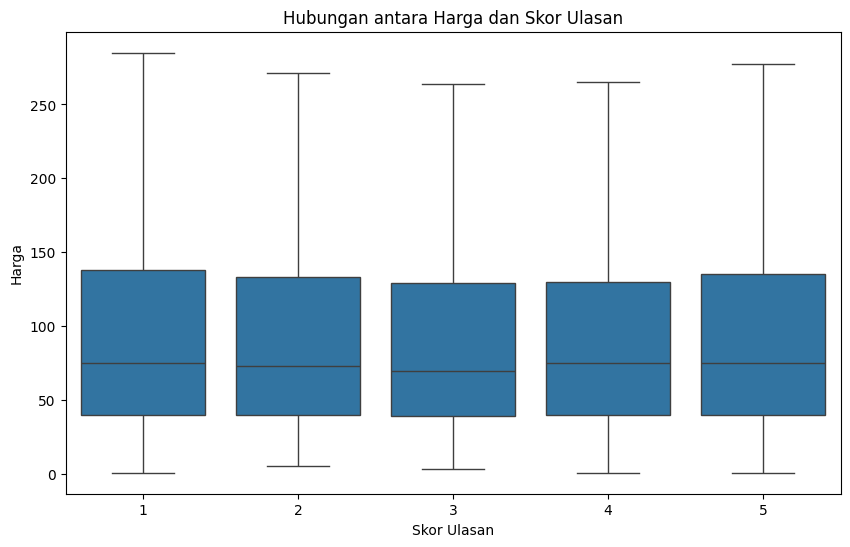

In [16]:
# Menentukan rentang harga
bins = [0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000]
labels = ['0-1000', '1000-2000', '2000-3000', '3000-4000', '4000-5000', 
          '5000-6000', '6000-7000', '7000-8000', '8000-9000', '9000-10000']

# Membuat kolom baru dengan rentang harga
df['price_range'] = pd.cut(df['price'], bins=bins, labels=labels, include_lowest=True)

# Menghitung jumlah produk dengan berbagai skor ulasan di setiap rentang harga
review_stats = df.groupby(['price_range', 'review_score']).size().unstack(fill_value=0)

# Menampilkan statistik jumlah produk di setiap rentang harga dan skor ulasan
print("Jumlah produk berdasarkan rentang harga dan skor ulasan:")
print(review_stats)

# Visualisasi hubungan harga dan skor ulasan menggunakan boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='review_score', y='price', data=df, showfliers=False)
plt.title('Hubungan antara Harga dan Skor Ulasan')
plt.xlabel('Skor Ulasan')
plt.ylabel('Harga')
plt.show()

In [17]:
# Menentukan rentang harga
bins = [0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000]
labels = ['0-1000', '1000-2000', '2000-3000', '3000-4000', '4000-5000', '5000-6000', '6000-7000', '7000-8000', '8000-9000', '9000-10000']

# Menambahkan kolom rentang harga ke DataFrame
df['price_range'] = pd.cut(df['price'], bins=bins, labels=labels, right=False)

# Menghitung rata-rata skor ulasan per rentang harga
average_reviews = df.groupby('price_range')['review_score'].mean().reset_index()

# Menampilkan hasil
print(average_reviews)

  price_range  review_score
0      0-1000      4.033156
1   1000-2000      3.935754
2   2000-3000      3.855670
3   3000-4000      4.312500
4   4000-5000      4.666667
5   5000-6000           NaN
6   6000-7000      5.000000
7   7000-8000           NaN
8   8000-9000           NaN
9  9000-10000           NaN


C:\Users\alfar\AppData\Local\Temp\ipykernel_6016\2409700915.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_reviews = df.groupby('price_range')['review_score'].mean().reset_index()


**Insight:**
- Sebagian besar produk (lebih dari 100 ribu produk) berada dalam rentang harga 0-1000. Ini menunjukkan bahwa produk dengan harga rendah mendominasi dalam dataset.
- Meskipun jumlah produk di rentang harga lebih tinggi jauh lebih sedikit, skor ulasannya secara umum cenderung lebih positif dibandingkan produk dengan harga lebih rendah.


## Visualization & Explanatory Analysis

### Pertanyaan 1: Kategori produk mana yang memiliki rating tertinggi yang memiliki minimal 100 pesanan

In [18]:
df = pd.read_csv('dashboard/filled_data.csv')

# Mengubah kolom 'shipping_limit_date' menjadi datetime
df['shipping_limit_date'] = pd.to_datetime(df['shipping_limit_date'])

# Menghitung jumlah pesanan berdasarkan product_id dan order_item_id
jumlah_penjualan_per_produk = df.groupby(['product_id', 'product_category_name_english']).size().reset_index(name='jumlah_penjualan')

# Menghitung total pendapatan per kategori
jumlah_pendapatan_per_produk = df.groupby(['product_id', 'product_category_name_english'])['price'].sum().reset_index(name='total_pendapatan')

# Menghitung jumlah pesanan dan total pendapatan per kategori
jumlah_penjualan_per_kategori = jumlah_penjualan_per_produk.groupby('product_category_name_english')['jumlah_penjualan'].sum().reset_index()
jumlah_pendapatan_per_kategori = jumlah_pendapatan_per_produk.groupby('product_category_name_english')['total_pendapatan'].sum().reset_index()

# Menggabungkan jumlah penjualan dengan total pendapatan
ringkasan_kategori = pd.merge(jumlah_penjualan_per_kategori, jumlah_pendapatan_per_kategori, on='product_category_name_english')

# Menghitung rata-rata skor ulasan per kategori produk
rata_rata_rating_per_kategori = df.groupby('product_category_name_english')['review_score'].mean().reset_index()

# Menggabungkan rata-rata rating dengan ringkasan kategori
ringkasan_kategori = pd.merge(ringkasan_kategori, rata_rata_rating_per_kategori, on='product_category_name_english')

# Membuat kolom Recency (waktu sejak pesanan terakhir)
tanggal_terakhir = df['shipping_limit_date'].max()
df['recency'] = (tanggal_terakhir - df['shipping_limit_date']).dt.days

# Menghitung Recency, Frequency, dan Monetary
recency_per_kategori = df.groupby('product_category_name_english')['recency'].min().reset_index()
frequency_per_kategori = jumlah_penjualan_per_kategori.groupby('product_category_name_english')['jumlah_penjualan'].sum().reset_index()
monetary_per_kategori = jumlah_pendapatan_per_kategori.groupby('product_category_name_english')['total_pendapatan'].sum().reset_index()

# Menggabungkan semua RFM
rfm_summary = pd.merge(recency_per_kategori, frequency_per_kategori, on='product_category_name_english')
rfm_summary = pd.merge(rfm_summary, monetary_per_kategori, on='product_category_name_english')

# Menambahkan rating untuk RFM
rfm_summary = pd.merge(rfm_summary, rata_rata_rating_per_kategori, on='product_category_name_english')

# Menghitung RFM Score
rfm_summary['RFM_Score'] = rfm_summary['recency'] * -1 + rfm_summary['jumlah_penjualan'] + rfm_summary['total_pendapatan']

# Menghitung ambang batas berdasarkan 5% dari total baris
threshold = int(len(df) * 0.05)

# Filter kategori dengan lebih dari ambang batas
kategori_terfilter = rfm_summary[rfm_summary['jumlah_penjualan'] > threshold]

# Pastikan ada kategori yang terfilter sebelum melanjutkan
if not kategori_terfilter.empty:
    # Menemukan kategori dengan rating tertinggi dari hasil filter
    kategori_rating_tertinggi = kategori_terfilter.loc[kategori_terfilter['review_score'].idxmax()]

    # Menampilkan hasil
    print("Kategori produk dengan rating tertinggi:")
    print(f"Nama Kategori: {kategori_rating_tertinggi['product_category_name_english']}")
    print(f"Rating Tertinggi: {kategori_rating_tertinggi['review_score']:.2f}")
    print(f"Jumlah Pesanan: {kategori_rating_tertinggi['jumlah_penjualan']}")
else:
    print("Tidak ada kategori yang memenuhi kriteria dengan lebih dari ambang batas 5% dari total pesanan.")

Kategori produk dengan rating tertinggi:
Nama Kategori: health_beauty
Rating Tertinggi: 4.14
Jumlah Pesanan: 9645


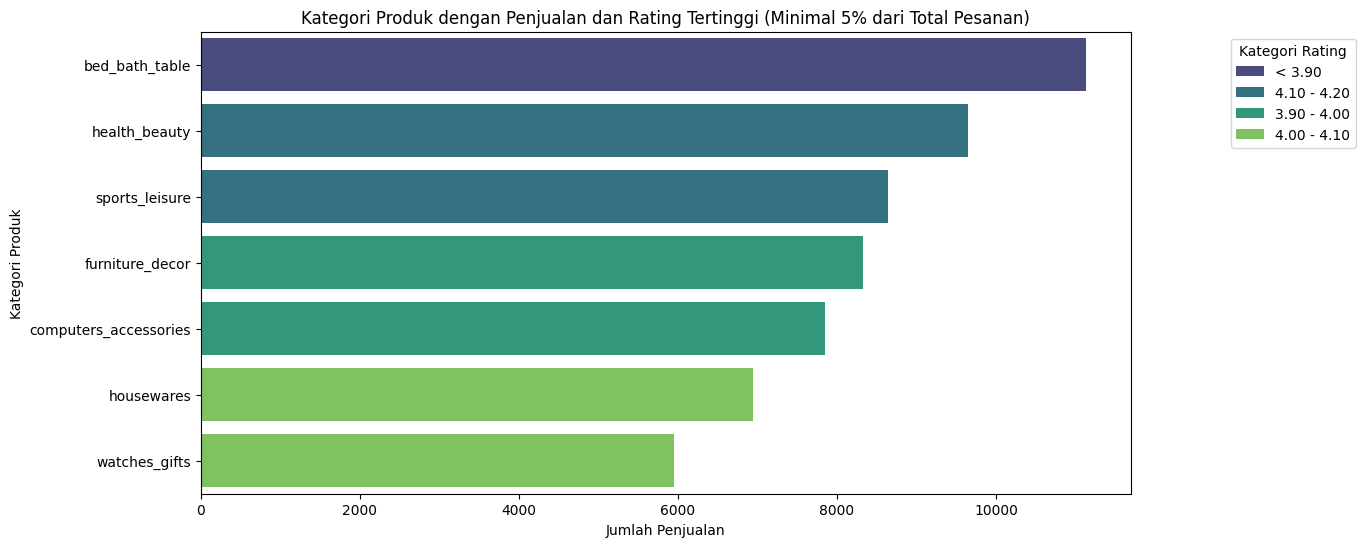

In [19]:
# Membaca dataset
df = pd.read_csv('dashboard/filled_data.csv')

# Menghitung rata-rata skor ulasan per kategori produk
rata_rata_rating_per_kategori = df.groupby('product_category_name_english')['review_score'].mean().reset_index()

# Menghitung jumlah produk yang terjual per kategori
jumlah_penjualan_per_produk = df.groupby(['product_id', 'product_category_name_english']).size().reset_index(name='jumlah_penjualan')

# Menghitung jumlah pesanan dan total pendapatan per kategori
jumlah_penjualan_per_kategori = jumlah_penjualan_per_produk.groupby('product_category_name_english')['jumlah_penjualan'].sum().reset_index()
jumlah_pendapatan_per_kategori = df.groupby('product_category_name_english')['price'].sum().reset_index(name='total_pendapatan')

# Menggabungkan jumlah penjualan dengan total pendapatan
ringkasan_kategori = pd.merge(jumlah_penjualan_per_kategori, jumlah_pendapatan_per_kategori, on='product_category_name_english')

# Menggabungkan rata-rata rating dengan ringkasan kategori
ringkasan_kategori = pd.merge(ringkasan_kategori, rata_rata_rating_per_kategori, on='product_category_name_english')

# Menghitung ambang batas berdasarkan 5% dari total baris
threshold = int(len(df) * 0.05)

# Filter kategori dengan lebih dari ambang batas
kategori_terfilter = ringkasan_kategori[ringkasan_kategori['jumlah_penjualan'] > threshold]

# Menampilkan 10 kategori dengan penjualan dan rating tertinggi
kategori_terfilter = kategori_terfilter.sort_values(by=['jumlah_penjualan', 'review_score'], ascending=False).head(10)

# Membuat kategori rating
def categorize_rating(rating):
    if rating < 3.90:
        return '< 3.90'
    elif 3.90 <= rating < 4.00:
        return '3.90 - 4.00'
    elif 4.00 <= rating < 4.10:
        return '4.00 - 4.10'
    elif 4.10 <= rating < 4.20:
        return '4.10 - 4.20'
    elif 4.20 <= rating < 4.30:
        return '4.20 - 4.30'
    else:
        return '>= 4.30'

# Menerapkan fungsi kategori rating
kategori_terfilter['rating_category'] = kategori_terfilter['review_score'].apply(categorize_rating)

# Visualisasi 1: Grafik Batang Kategori Produk
plt.figure(figsize=(12, 6))
sns.barplot(data=kategori_terfilter, 
             x='jumlah_penjualan', 
             y='product_category_name_english', 
             hue='rating_category',  # Menggunakan kategori rating untuk hue
             palette='viridis')

plt.title('Kategori Produk dengan Penjualan dan Rating Tertinggi (Minimal 5% dari Total Pesanan)')
plt.xlabel('Jumlah Penjualan')
plt.ylabel('Kategori Produk')
plt.legend(title='Kategori Rating', bbox_to_anchor=(1.10, 1), loc='upper left')
plt.show()

### Pertanyaan 2: Kategori produk apa saja yang memiliki penjualan terendah


In [20]:
df = pd.read_csv('dashboard/filled_data.csv')

# Menghitung jumlah produk yang terjual per kategori
jumlah_penjualan_produk = df.groupby('product_category_name_english').size().reset_index(name='jumlah_penjualan')

# Menambahkan kolom harga dan rating dengan menghitung rata-rata per kategori
produk_terjual = df.groupby('product_category_name_english').agg({
    'price': 'mean',  # Mengambil harga rata-rata
    'review_score': 'mean'  # Mengambil rating rata-rata
}).reset_index()

# Menggabungkan data penjualan produk dengan informasi harga dan rating
jumlah_penjualan_produk = pd.merge(jumlah_penjualan_produk, produk_terjual, on='product_category_name_english', how='left')

# Menentukan jumlah produk terendah yang ingin ditampilkan
jumlah_produk_terendah = 10  # Misalnya, menampilkan 10 kategori dengan penjualan terendah

# Mengidentifikasi kategori yang terdefinisi (tidak dalam format "Produk + angka")
kategori_terdefinisi = jumlah_penjualan_produk[
    ~jumlah_penjualan_produk['product_category_name_english'].str.contains(r'Produk \d+', regex=True)
]

# Menemukan kategori dengan penjualan terendah yang terdefinisi
produk_berkategori = kategori_terdefinisi.nsmallest(jumlah_produk_terendah, 'jumlah_penjualan')

# Menemukan kategori yang tidak terdefinisi
produk_tidak_berkategori = jumlah_penjualan_produk[
    jumlah_penjualan_produk['product_category_name_english'].str.contains(r'Produk \d+', regex=True)
]

# Mengambil sejumlah produk terendah untuk kategori tak terdefinisi
produk_tidak_berkategori = produk_tidak_berkategori.nsmallest(jumlah_produk_terendah, 'jumlah_penjualan')

# Menampilkan hasil untuk produk berkategori
print("Produk dengan penjualan terendah (kategori terdefinisi):")
if not produk_berkategori.empty:
    for index, row in produk_berkategori.iterrows():
        print(f"Nama Kategori: {row['product_category_name_english']}, "
              f"Jumlah Penjualan: {row['jumlah_penjualan']}, Harga Rata-rata: {row['price']:.2f}, Rating Rata-rata: {row['review_score']:.1f}")
else:
    print("Tidak ada produk dengan penjualan terendah yang terdefinisi.")

# Menampilkan hasil untuk produk tanpa kategori
print("\nProduk dengan penjualan terendah (tanpa kategori):")
if not produk_tidak_berkategori.empty:
    for index, row in produk_tidak_berkategori.iterrows():
        print(f"Nama Kategori: {row['product_category_name_english']}, "
              f"Jumlah Penjualan: {row['jumlah_penjualan']}, Harga Rata-rata: {row['price']:.2f}, Rating Rata-rata: {row['review_score']:.1f}")
else:
    print("Tidak ada produk dengan penjualan terendah yang tanpa kategori.")

Produk dengan penjualan terendah (kategori terdefinisi):
Nama Kategori: security_and_services, Jumlah Penjualan: 2, Harga Rata-rata: 141.64, Rating Rata-rata: 2.5
Nama Kategori: fashion_childrens_clothes, Jumlah Penjualan: 8, Harga Rata-rata: 71.23, Rating Rata-rata: 4.5
Nama Kategori: la_cuisine, Jumlah Penjualan: 13, Harga Rata-rata: 147.54, Rating Rata-rata: 4.0
Nama Kategori: cds_dvds_musicals, Jumlah Penjualan: 14, Harga Rata-rata: 52.14, Rating Rata-rata: 4.6
Nama Kategori: arts_and_craftmanship, Jumlah Penjualan: 24, Harga Rata-rata: 75.58, Rating Rata-rata: 4.1
Nama Kategori: home_comfort_2, Jumlah Penjualan: 27, Harga Rata-rata: 26.72, Rating Rata-rata: 3.6
Nama Kategori: fashion_sport, Jumlah Penjualan: 31, Harga Rata-rata: 69.18, Rating Rata-rata: 4.3
Nama Kategori: flowers, Jumlah Penjualan: 31, Harga Rata-rata: 32.27, Rating Rata-rata: 4.4
Nama Kategori: furniture_mattress_and_upholstery, Jumlah Penjualan: 38, Harga Rata-rata: 114.95, Rating Rata-rata: 3.8
Nama Kategori: m

C:\Users\alfar\AppData\Local\Temp\ipykernel_6016\2043251682.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=produk_berkategori,


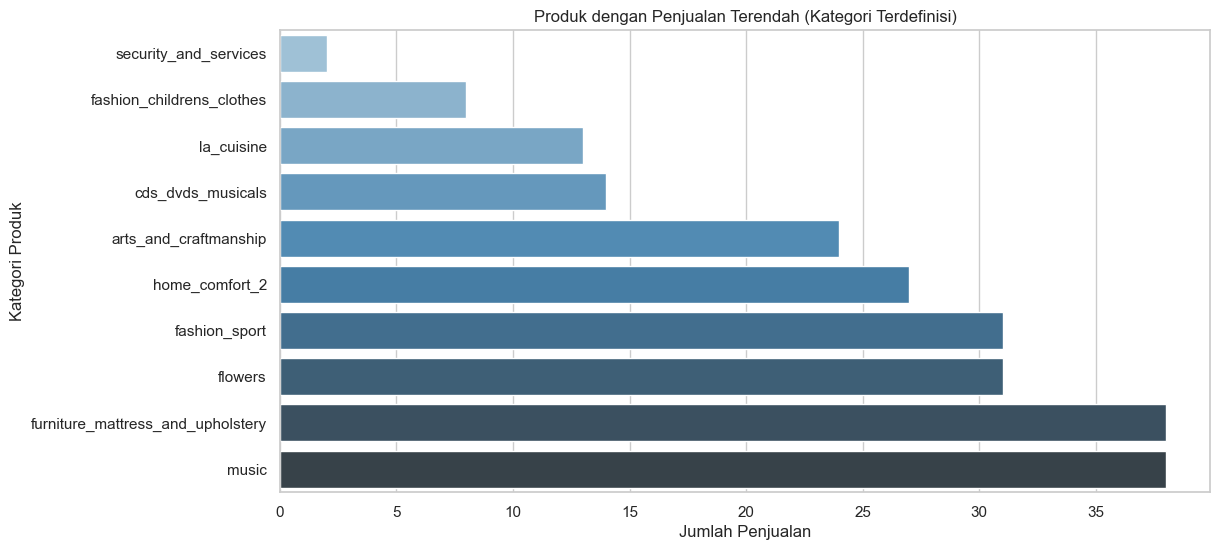

C:\Users\alfar\AppData\Local\Temp\ipykernel_6016\2043251682.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=produk_tidak_berkategori,


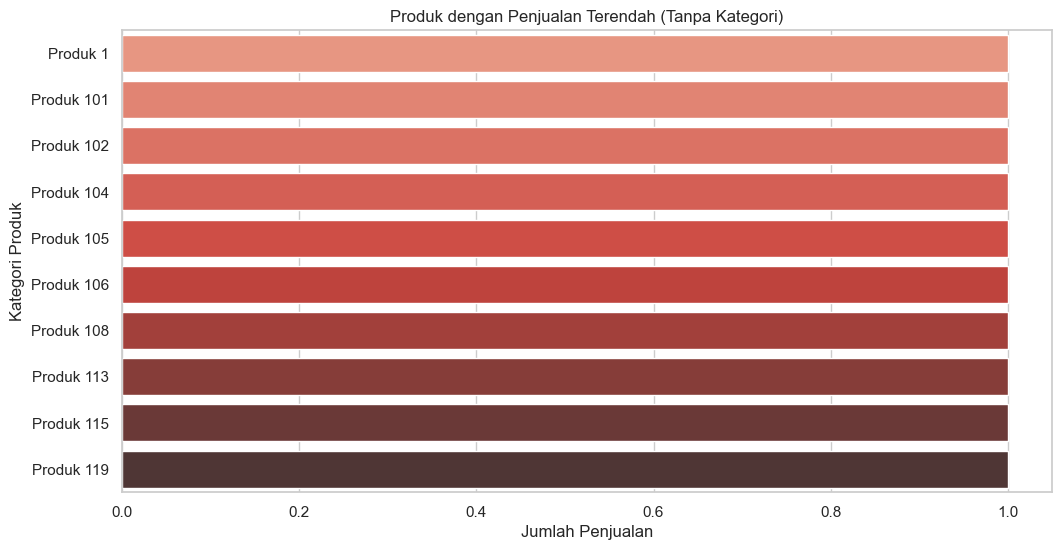

In [21]:
# Set the visual style
sns.set(style="whitegrid")

# Visualisasi untuk produk berkategori
plt.figure(figsize=(12, 6))
sns.barplot(data=produk_berkategori, 
            x='jumlah_penjualan', 
            y='product_category_name_english', 
            palette='Blues_d')

plt.title('Produk dengan Penjualan Terendah (Kategori Terdefinisi)')
plt.xlabel('Jumlah Penjualan')
plt.ylabel('Kategori Produk')
plt.show()

# Visualisasi untuk produk tanpa kategori
plt.figure(figsize=(12, 6))
sns.barplot(data=produk_tidak_berkategori, 
            x='jumlah_penjualan', 
            y='product_category_name_english', 
            palette='Reds_d')

plt.title('Produk dengan Penjualan Terendah (Tanpa Kategori)')
plt.xlabel('Jumlah Penjualan')
plt.ylabel('Kategori Produk')
plt.show()

**Insight:**
- Kategori produk "health_beauty" yang memiliki rating tinggi dan jumlah pesanan di atas 5% total pesanan menunjukkan bahwa ada keunggulan dalam segmen pasar tertentu. Kategori ini kemungkinan memenuhi kebutuhan dan keinginan konsumen dengan baik.
- Dengan mengetahui kategori yang paling baik, perusahaan dapat menganalisis pesaing di kategori tersebut untuk memahami faktor-faktor yang berkontribusi pada kesuksesan dan rating tinggi produk.
- Security and Services dan Fashion Children's Clothes memiliki penjualan terendah dengan masing-masing 2 dan 8 unit terjual. Hal ini mungkin menunjukkan bahwa kategori-kategori ini kurang diminati oleh konsumen.
- Kategori dengan penjualan lebih tinggi, seperti Home Comfort 2 dan Music, menunjukkan bahwa produk dalam kategori ini mungkin lebih relevan atau lebih dipromosikan dengan baik, sehingga bisa menjadi area yang bisa dikembangkan lebih lanjut.
- Meskipun produk dalam kategori seperti Arts and Craftsmanship dan Fashion Sports memiliki penjualan yang lebih baik, harga rata-rata mereka (sekitar 75-70) dan rating yang baik (4.1 dan 4.3) menunjukkan bahwa konsumen bersedia membayar lebih untuk kategori-kategori ini.
- Kategori Security and Services memiliki harga rata-rata tinggi (141.64) tetapi rating yang rendah (2.5), yang menunjukkan adanya masalah dengan produk atau layanan yang ditawarkan di kategori ini.
- Banyak produk yang tidak memiliki kategori terdefinisi penjualannya sangat rendah, masing-masing hanya terjual satu unit. Ini menunjukkan bahwa produk-produk ini mungkin tidak dipromosikan dengan baik, kurang diminati konsumen atau dikarenakan tidak mempunyai kategori spesifik sehingga hanya memiliki 1 pengelompokkan.

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclution pertanyaan 1

Dari analisis yang dilakukan, termasuk penerapan RFM, kategori produk yang menunjukkan kombinasi terbaik antara rating dan jumlah penjualan adalah "health_beauty". Kategori ini tidak hanya memiliki rating tertinggi, tetapi juga volume penjualan yang signifikan. Oleh karena itu, fokus pada pengembangan produk dan strategi pemasaran dalam kategori ini dapat memberikan keuntungan jangka panjang dan meningkatkan loyalitas pelanggan.
- Conclution pertanyaan 2

Dari analisis di atas, dapat disimpulkan bahwa kategori produk dengan penjualan terendah yang terdefinisi adalah "security_and_services" dengan hanya 2 penjualan, sedangkan produk tanpa kategori terdefinisi memiliki beberapa produk dengan satu penjualan. Hal ini menunjukkan bahwa ada peluang untuk meningkatkan strategi pemasaran dan pengembangan produk dalam kategori yang terdefinisi, terutama "security_and_services", untuk menarik lebih banyak konsumen. Selain itu, perhatian juga perlu diberikan pada produk tanpa kategori untuk memberikan identitas yang lebih jelas dan menarik bagi pelanggan, serta dapat lebih mudah untuk dikelompokkan.